In [13]:
import pandas as pd
df= pd.read_csv("Social_Network_Ads1.csv")

In [14]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [15]:
df.shape


(400, 5)

In [16]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [17]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [19]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
from sklearn import preprocessing


In [21]:
lb=preprocessing.LabelEncoder()


In [22]:
df['Gender']=lb.fit_transform(df['Gender'])

In [23]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [24]:
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [25]:
df.drop('User ID',axis=1,inplace=True)

In [26]:
df


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [27]:
import seaborn as sns

<Axes: >

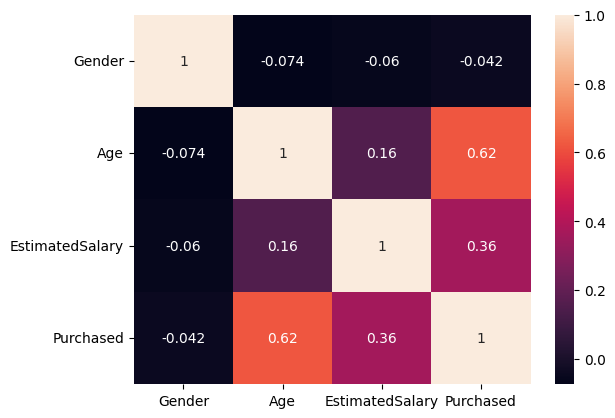

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
X=df.drop('Purchased',axis=1)


In [30]:
X


,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [31]:
y=df['Purchased']

In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [34]:
x_train

,Gender,Age,EstimatedSalary
163,1,35,38000
229,0,42,80000
213,1,35,58000
188,1,35,72000
386,0,49,39000
...,...,...,...
343,0,47,51000
359,1,42,54000
323,0,48,30000
280,0,59,88000


In [35]:
x_test

,Gender,Age,EstimatedSalary
248,1,41,52000
318,1,45,32000
173,0,34,43000
285,0,37,93000
184,0,33,60000
...,...,...,...
380,1,42,64000
311,1,39,96000
110,0,39,71000
90,1,22,81000


In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_test=std.fit_transform(x_test)
x_train=std.fit_transform(x_train)

In [37]:
x_test

array([[ 1.08347268,  0.30608199, -0.48069117],
       [ 1.08347268,  0.68630807, -1.16592447],
       [-0.92295821, -0.35931364, -0.78904615],
       [-0.92295821, -0.07414408,  0.92403712],
       [-0.92295821, -0.45437016, -0.20659784],
       [ 1.08347268,  0.78136459,  0.4443738 ],
       [-0.92295821,  0.30608199, -0.51495283],
       [ 1.08347268, -0.07414408,  0.13601881],
       [ 1.08347268,  0.30608199, -0.72052282],
       [-0.92295821, -0.83459624, -0.65199949],
       [-0.92295821,  0.11596895, -0.17233618],
       [ 1.08347268,  0.40113851,  0.23880381],
       [-0.92295821,  0.02091243, -0.03528952],
       [-0.92295821, -0.45437016,  2.84269038],
       [-0.92295821,  2.11215585, -0.68626116],
       [-0.92295821,  1.3517037 , -0.96035448],
       [ 1.08347268,  0.21102547, -0.30938284],
       [-0.92295821,  0.11596895,  0.30732714],
       [-0.92295821, -0.26425712, -1.40575613],
       [ 1.08347268, -0.73953972, -1.74837278],
       [-0.92295821,  0.11596895,  0.444

In [38]:
x_train

array([[ 1.00000000e+00, -2.50017186e-01, -9.30520479e-01],
       [-1.00000000e+00,  4.19671705e-01,  2.54496505e-01],
       [ 1.00000000e+00, -2.50017186e-01, -3.66226677e-01],
       [ 1.00000000e+00, -2.50017186e-01,  2.87789839e-02],
       [-1.00000000e+00,  1.08936060e+00, -9.02305789e-01],
       [-1.00000000e+00, -1.01537592e+00, -3.94441367e-01],
       [ 1.00000000e+00,  7.06681230e-01, -1.38195552e+00],
       [-1.00000000e+00,  9.93690755e-01, -1.18445269e+00],
       [ 1.00000000e+00,  1.08936060e+00,  4.23784645e-01],
       [ 1.00000000e+00, -8.24036236e-01,  2.54496505e-01],
       [-1.00000000e+00,  1.47203996e+00,  9.31649067e-01],
       [ 1.00000000e+00, -1.01537592e+00, -1.43838490e+00],
       [ 1.00000000e+00, -6.32696553e-01,  1.41637744e-01],
       [-1.00000000e+00, -7.28366394e-01, -2.53367917e-01],
       [-1.00000000e+00,  6.11011389e-01,  1.91916322e+00],
       [ 1.00000000e+00, -7.28366394e-01,  2.54496505e-01],
       [ 1.00000000e+00, -8.24036236e-01

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_predict=model.predict(x_test)

In [41]:
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [43]:
accuracy=accuracy_score(y_predict,y_test)

In [44]:
accuracy

0.87

In [45]:
precision=precision_score(y_predict,y_test)

In [46]:
precision

0.7428571428571429

In [47]:
recall=recall_score(y_predict,y_test)

In [48]:
recall

0.8666666666666667

In [49]:
error=1-accuracy

In [50]:
error

0.13

In [51]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [52]:
cn=confusion_matrix(y_predict,y_test)

In [53]:
cn

array([[61,  9],
       [ 4, 26]])

In [54]:
TN,FP,FN,TP=confusion_matrix(y_predict,y_test).ravel()

In [55]:
(TN,FP,FN,TP)

(61, 9, 4, 26)

In [56]:
CM=confusion_matrix(y_predict,y_test)

In [57]:
CM

array([[61,  9],
       [ 4, 26]])

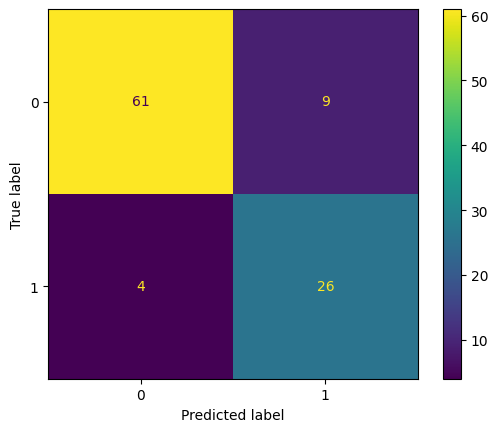

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
cm1=ConfusionMatrixDisplay(cn).plot()